### 准备数据集 [OpenFOAM, 圆柱绕流]

雷诺数 = 100 (u = 1, d = 1, $\nu$ = 0.01)

边界条件：
1. U
   1. Up and Down: symmetry
   2. Left: fixedValue uniform (1 0 0)
   3. Right: zeroGradient
   4. Cylinder: noSlip
2. P
   1. Up and Down: symmetry
   2. Left: zeroGradient
   3. Right: fixedValue uniform 0
   4. Cylinder: zeroGradient

速度场
<video controls src="assets/videos/U_magnitude.mp4" title="Title"></video>

### 数据处理

需要将流场数据转换为神经网络可以处理的数据格式：
1. 忽略空间信息，将时间和空间分别作为矩阵的行和列，构建这样一个大时空矩阵
2. 使用resample方法将流场数据采样到均匀的网格上

一般的，使用涡量来描述圆柱绕流，对于二维流场来说，涡量计算如下：
$$
\omega = \frac{\partial u}{\partial y} - \frac{\partial v}{\partial x}
$$

<video controls src="assets/videos/vorticity.mp4" title="Title"></video>

In [ ]:
import numpy as np

NSAMPLES = 1000
NX = 256
NY = 128

dataset = np.zeros((NX*NY, NSAMPLES))
for i in range(NSAMPLES):
    dataset[:, i] = np.genfromtxt(f'data/dataset/data_{i}.csv', skip_header=1, delimiter=',')[:, 2]

np.save('data/vorticity_dataset.npy', dataset)

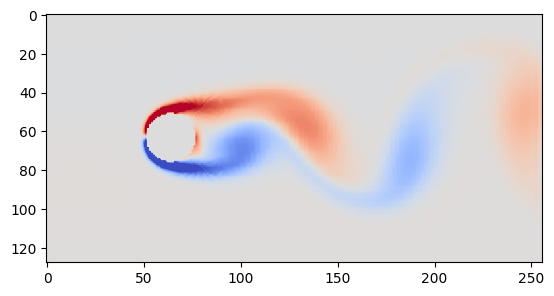

In [3]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.load('data/vorticity_dataset.npy')

import matplotlib.pyplot as plt
plt.imshow(dataset[:, -1].reshape(NY, NX), cmap='coolwarm', vmin=-5, vmax=5)
plt.show()

### 